Brainstorm während Vor1:
    - Vokabeln: 
        - ML vs. AI: ML ist sub-discipline und zeichnet sich dadurch aus, dass extracted knowledge getestet wird und fd back into the machine so dass Model refined wird
        - Supervised vs. Unsupervised
        - Data and Notaion: Response = Y ; Predictors = Variables = Features X ; so dass f(x)=y ; gell X=Vektor ; Trainingdata aus n Tuplen (x,y) mit je xT=(x1,x2,...xp) also ganzer Trainingsdatensatz ist nxp Matrix. 
        - Learning: Adjust the fit parameters beta
        - Categorical vs. Ordinal ;; Regression vs. Classification ;; f(x) ist entweder continuous oder discrete ;; Bsp Musik die du hörst + Lieblingsessen -> Herkunftskontinent. Geht aber schwierig im Detail. 
        - Parametric vs. Non-parametric methods (feste funktionelle Form vs. variabel. Vlt Hyperparameter einführen)
        - R2 aus 1-Rss/Tss 
        - Overfitting and Regularization: Overfitting an polynomial Beispiel
        - Regularisierung: RSS = (yi-yipred)² + lambda*sum(betas)² 

    - Aufbau: 
        - Linear:
            - Formel, Error via RSS (sum(yi-xibi)²), beta als minimum direkt analytisch als b=(xTx)-1xTy ; 
            - multiple outputs
            - Lasso, Ridge
        - Nonlinear 
            - Polynomial 
    - Brainstorm:
        - Einfachstes Beispiel: Anzahl Atome vs. molekulare Masse ; Fitte Beta via ML und erhalte so die durchschnittliche Massenzahl (mass number)
    - Mathe unklar:
        - 2.1 dRss/dbeta=-2xT(y-xbeta)=0 -> beta = (xTx)-1 xTy ;; ok ich versteh dass man durch -2 teilt, ausmultipliziert, xtxbeta nach rechts; dann von links mit (xtx)-1 ; aber warum darf man nicht direkt durch -2 teilen und dann xT-1 von links?

Welcome to the linear regression tutorial! bla...
During the next 20 minutes, we want to repeat the most important things from the lecture and learn how to implement these things in python. You will need this among others for the excercise. 
We will download a data set, perform linear regression once in an analytical way and once in a machine learing way. 

0. Import all modules that we need during this tutorial 

In [82]:
import numpy as np # powerful numerical package for all kinds of algebra and calculus
np.set_printoptions(precision=3) # numpy rounds all numbers to 3rd decimals 
import pandas as pd # data manipulation package (excel for python) with lots of useful functions based on numpy
import matplotlib.pyplot as plt # plotting library
import seaborn as sns # advanced plotting library  
# sklearn is one of the most popular machine learning libraries. Do not import the whole huge package, but only the modules, that you need.
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

1. Load a data set and inspect it

In [66]:
# load it
data = pd.read_csv(
    "https://github.com/whitead/dmol-book/raw/main/data/curated-solubility-dataset.csv"
)
# inspecting
print("Data shape:", data.shape)
print("Data columns:", data.columns)
print("First 5 of 9982 entries look like this:")
data.head() 

Data shape: (9982, 26)
Data columns: Index(['ID', 'Name', 'InChI', 'InChIKey', 'SMILES', 'Solubility', 'SD',
       'Ocurrences', 'Group', 'MolWt', 'MolLogP', 'MolMR', 'HeavyAtomCount',
       'NumHAcceptors', 'NumHDonors', 'NumHeteroatoms', 'NumRotatableBonds',
       'NumValenceElectrons', 'NumAromaticRings', 'NumSaturatedRings',
       'NumAliphaticRings', 'RingCount', 'TPSA', 'LabuteASA', 'BalabanJ',
       'BertzCT'],
      dtype='object')
First 5 of 9982 entries look like this:


,ID,Name,InChI,InChIKey,SMILES,Solubility,SD,Ocurrences,Group,MolWt,...,NumRotatableBonds,NumValenceElectrons,NumAromaticRings,NumSaturatedRings,NumAliphaticRings,RingCount,TPSA,LabuteASA,BalabanJ,BertzCT
0,A-3,"N,N,N-trimethyloctadecan-1-aminium bromide",InChI=1S/C21H46N.BrH/c1-5-6-7-8-9-10-11-12-13-...,SZEMGTQCPRNXEG-UHFFFAOYSA-M,[Br-].CCCCCCCCCCCCCCCCCC[N+](C)(C)C,-3.616127,0.0,1,G1,392.510,...,17.0,142.0,0.0,0.0,0.0,0.0,0.00,158.520601,0.000000e+00,210.377334
1,A-4,Benzo[cd]indol-2(1H)-one,InChI=1S/C11H7NO/c13-11-8-5-1-3-7-4-2-6-9(12-1...,GPYLCFQEKPUWLD-UHFFFAOYSA-N,O=C1Nc2cccc3cccc1c23,-3.254767,0.0,1,G1,169.183,...,0.0,62.0,2.0,0.0,1.0,3.0,29.10,75.183563,2.582996e+00,511.229248
2,A-5,4-chlorobenzaldehyde,InChI=1S/C7H5ClO/c8-7-3-1-6(5-9)2-4-7/h1-5H,AVPYQKSLYISFPO-UHFFFAOYSA-N,Clc1ccc(C=O)cc1,-2.177078,0.0,1,G1,140.569,...,1.0,46.0,1.0,0.0,0.0,1.0,17.07,58.261134,3.009782e+00,202.661065
3,A-8,"zinc bis[2-hydroxy-3,5-bis(1-phenylethyl)benzo...",InChI=1S/2C23H22O3.Zn/c2*1-15(17-9-5-3-6-10-17...,XTUPUYCJWKHGSW-UHFFFAOYSA-L,[Zn++].CC(c1ccccc1)c2cc(C(C)c3ccccc3)c(O)c(c2)...,-3.924409,0.0,1,G1,756.226,...,10.0,264.0,6.0,0.0,0.0,6.0,120.72,323.755434,2.322963e-07,1964.648666
4,A-9,4-({4-[bis(oxiran-2-ylmethyl)amino]phenyl}meth...,InChI=1S/C25H30N2O4/c1-5-20(26(10-22-14-28-22)...,FAUAZXVRLVIARB-UHFFFAOYSA-N,C1OC1CN(CC2CO2)c3ccc(Cc4ccc(cc4)N(CC5CO5)CC6CO...,-4.662065,0.0,1,G1,422.525,...,12.0,164.0,2.0,4.0,4.0,6.0,56.60,183.183268,1.084427e+00,769.899934


2. As you can see, there are roughly 10,000 entries in the data set. Out of the 26 columns,some have a chemical meaning (SMILES encoding a molecular structure, NumRotatableBonds, NumAromaticRings,...), some a physical (Solubility, Molwt (mass), ASA (Accessible Surface Area),...) and some are only for the data structure (ID, Group, Ocurrences). 
We start with an easy example: We want to predict the molecular weight of the molecules with the number of heavy (non hydrogen) atoms. 
First thing is always to check whether any of the 10,000 entries are missing (NaN - not a number) and check for easily seable correlations.   

In [ ]:
# check molecular weight entries
print("---- MolWt describe ----")
print(data["MolWt"].describe() )
print("\n---- MolWt check NaN ----")
print(data["MolWt"].isna().sum())
# check heavy atom entries 
print("---- HeavyAtomCount describe ----")
print(data["HeavyAtomCount"].describe() )
print("\n---- HeavyAtomCount check NaN ----")
print(data["HeavyAtomCount"].isna().sum())


The data type "float64" indicates that there are only float numbers in our entries, no strings or objects or other data types. No NaN values indicate that all of the float entries are actually numbers. NaN entries can occur when deviding by zero or other operations leading to no result. Let's visualize the ditribution of the data. 

In [ ]:
sns.pairplot(data[["MolWt", "HeavyAtomCount"]])

Not surprisingly, we can already see a linear correlation between the number of heavy atoms and the molecular weight. Let's try out, how we can obtain the slope of the best linear fit (without calculating the average weight of the heavy atoms). The frst is the analytical way: 

3. Get fit parameter analytically: 

In a supervised scenario, where the inputs and outputs are known, we want to predict 

Y (aka Response, Targets, Labels) 

with 

X (aka Features, Variables, Predictors).

In a one dimesional linear regression, it is simply 
$$
   \mathbf{Y} = f(\mathbf{X}) = \beta_0+\beta_1\mathbf{X} 
$$
The vector $\mathbf{Y}$ contains all 10,000 target values $y_i$ (MolWeight) and the vector $\mathbf{X}$ contains all 10,000 features $x_i$ (Number-heavyatoms). The $\beta_0$ and $\beta_1$ are scalar values that we want to find. 

A common notation adds a "One" as an aditional entry to all Features and summarizes all betas into a vector itself, so one feature $x_i$ gets to the vector ${x_i^T}=(1, x_i)$ and the betas get to $\beta^T=(\beta_0, \beta_1)$ leading to 
$$
   \mathbf{Y} = f(\mathbf{X}) = {X^T}\beta
$$
Most often, people just write $X\beta$ instead of $X^T\beta$.

From the lecture, we know that the residual sum of squares is given by 
$$
RSS = \sum_i^n (y_{i,true} - y_{i,pred})^2 = ({Y}-{X}\beta)^2 = ({Y}-{X}\beta)^T({Y}-{X}\beta)
$$
and the minimum with zero first derivative can be found via
$$
dRSS/d\beta=-2{X}^T({Y}-{X}\beta)=0 <=> \beta=({X^T}{X})^{-1}{X^T}{Y}
$$

The same thing written in a different way (Lukas, wir müssen reden^^) would be the RSS wikpedia page
$$
{Y}={X}\beta <=> {X^T}{Y}={X^T}{X}\beta<=>\beta=({X^T}{X})^{-1}{X^T}{Y}
$$
Let's try this out with ${Y} \in R^{9982}$ and ${X} \in R^{2\times9982}$ and $\beta \in R^2$:

In [63]:
y = np.array(data["MolWt"])
x = np.array(data["HeavyAtomCount"])
print("x shape:", x.shape, "first 2 entries:\n", x[:2])
# add an extra dimension to x
x = x[:, np.newaxis]
print("x shape:", x.shape, "first 2 entries:\n", x[:2])
# fill the extra dimension with ones 
x = np.hstack([np.ones_like(x), x])
print("x shape:", x.shape, "first 2 entries: \n", x[:2])

# Calculate Beta with numpy's matrix product np.matmul (shortcut "@")
# and its inverting function linalg.inv()
print("\ncalculating beta...")
beta = np.linalg.inv((x.T @ x)) @ x.T @ y
print("beta =",beta) 

x shape: (9982,) first 2 entries:
 [23. 13.]
x shape: (9982, 1) first 2 entries:
 [[23.]
 [13.]]
x shape: (9982, 2) first 2 entries: 
 [[ 1. 23.]
 [ 1. 13.]]

calculating beta...
beta = [18.234 14.299]


We found an analytical expression: $\beta_0$ is 18.2 and $\beta_1$ is 14.3. Let's see how good the fit is: 

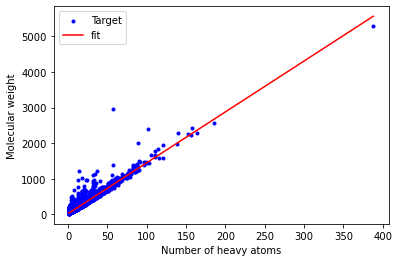

In [62]:
# plot the molecular weight and the linearly transformed number of heavy atoms

# create the figure
fig, ax = plt.subplots() 
# plot blue scatters
ax.scatter(data["HeavyAtomCount"], data["MolWt"], color="blue", marker=".", label="Target")
# for the linear fit, create 1000 values between the minimum and maximum number of heavy atoms
x_values = np.linspace(data["HeavyAtomCount"].min(), data["HeavyAtomCount"].max(), 1000)
# plot the linear fit with the betas
ax.plot(x_values, beta[0]+x_values*beta[1], color="red", label="fit")
# set appearance of axis and create a legend
ax.set_xlabel("Number of heavy atoms")
ax.set_ylabel("Molecular weight")
ax.legend() 

This looks good. We will talk about quantifying the goodness of a fit at the end of this tutorial. 

4. Luckily, the same job can be done with sophisticated packages like scikit learn. It is easy to use and only needs a few steps:

In [61]:
# data parsing
y = np.array(data["MolWt"])
x = np.array(data["HeavyAtomCount"]).reshape(-1,1) # reshape makes [1,2,3] to [[1],[2],[3]]. This is often needed for various functions around numpy.
# create a model object (we imported it from sklearn)
regr = linear_model.LinearRegression()
# the determination of betas is called fitting (or training)
regr.fit(x, y)
# get the betas
print("The betas obtained from scikit-learn are:\n", regr.intercept_, " and ", regr.coef_[0])

The betas obtained from scikit-learn are:
 18.233651405997847  and  14.298529479612462


The results are identical, because scikit-learn does the exact same analytical calculation (Ordinary Least Squares) under the hood. We will see deviations of machine learned coefficients in the next lecture. 

Let's try the same procedure for a more complicated problem: Can we predict the solubility of a molecule with its molecular weight, its solvent accesssible surface area and its Number of hydrogen-bond acceptors? 

In [78]:
# parsing
y_multi = np.array(data["Solubility"])
x_multi = np.array(data[["MolWt", "LabuteASA", "NumHAcceptors"]])

A very common strategy in ML is to split the data set into train and test sets. This allows evaluating the performance of the model on a test set, that the model has never seen during training. 

In [79]:
# split it into 80/20 train/test
x_train, x_test, y_train, y_test = train_test_split(x_multi, y_multi, test_size=0.2)
print("Training features have shape: ", x_train.shape)
print("Testing features have shape: ", x_test.shape)
print("Training targets have shape: ", y_train.shape)
print("Testing targets have shape: ", y_test.shape)

Training features have shape:  (7985, 3)
Testing features have shape:  (1997, 3)
Training targets have shape:  (7985,)
Testing targets have shape:  (1997,)


Train the model for multilinear regression.

In [81]:
multiregr = linear_model.LinearRegression()
# the determination of betas is called fitting (or training)
multiregr.fit(x_train, y_train)
# get the betas
print("The betas obtained from scikit-learn are:\n", multiregr.intercept_, " and ", multiregr.coef_)

The betas obtained from scikit-learn are:
 -1.5220888281724203  and  [-0.008 -0.007  0.46 ]


Note that there are 3 coefficients, one for each feature and still one $\beta_0$.

We cannot plot 4 dimensions, easily. But because of the test set, we can evaluate the model's performance. E.g. via the mean asolute error, the root mean squared error and the coefficient of determination (R2):

$$
\begin{align}
MAE &= \frac{1}{n} \sum_i^n | y_{true} - y_{pred} | \\
RMSE &= \sqrt{\frac{1}{n} \sum_i^n (y_{true} - y_{pred})^2} \\
R_2 &= 1- \frac{\sum_i (y_{true} - y_{pred})^2}{\sum_i (y_{true} - \bar{y})^2}
\end{align}
$$

In [86]:
# get the predictions
predictions = multiregr.predict(x_test)
# and compare them agains the true values y_test 
print("MAE = ", mean_absolute_error(y_test, predictions))
print("RMSE = ", mean_squared_error(y_test, predictions, squared=False))
print("R2 = ", r2_score(y_test, predictions))

MAE =  1.4667851248797226
RMSE =  1.9372057555946154
R2 =  0.335053556158623
